# Problem Set 5

In [10]:
# Standard Setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
plt.xkcd()

In [33]:
# Initialise the dataframe
df_drinks = pd.read_csv("drinking.csv", header=1)
df_drinks

,Date,Number of cans,Amount in SGD
0,2022-02-11,2,21.40
1,2022-02-12,1,12.84
2,2022-02-13,2,21.40
3,2022-02-14,10,128.40
4,2022-02-15,2,21.40
5,2022-02-16,2,25.68
6,2022-02-17,2,21.40
7,2022-02-18,10,128.40
8,2022-02-19,2,21.40
9,2022-02-20,2,25.68


## Problem Set 5.1

In [3]:
x = np.arange(1,11)
y = x**2
coordinates = list(zip(x, y))
np.savetxt("quadratic.csv", coordinates)

## Problem Set 5.2

In [4]:
df_drinks.dtypes

Date               object
Number of cans      int64
Amount in SGD     float64
dtype: object

In [34]:
df_drinks["Date"] = df_drinks["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [35]:
df_drinks.dtypes

Date              datetime64[ns]
Number of cans             int64
Amount in SGD            float64
dtype: object

## Problem Set 5.3

In [37]:
df_drinks_2 = pd.read_csv("drinking2.csv", header=1)
df_drinks_2["Date"] = df_drinks_2["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [42]:
concat_df_drinks = pd.concat(objs=[df_drinks, df_drinks_2])
concat_df_drinks

,Date,Number of cans,Amount in SGD
0,2022-02-11,2,21.40
1,2022-02-12,1,12.84
2,2022-02-13,2,21.40
3,2022-02-14,10,128.40
4,2022-02-15,2,21.40
5,2022-02-16,2,25.68
6,2022-02-17,2,21.40
7,2022-02-18,10,128.40
8,2022-02-19,2,21.40
9,2022-02-20,2,25.68


Pandas concat merges two dataframes together via their indices, either by the row or column indices. Pandas does not edit the indices of the dataframes when concatenating.

## Problem Set 5.4

In [46]:
df_brands = pd.read_csv("brand.csv", header=1)
df_brands["Date"] = df_brands["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
df_brands

,Date,Brand
0,2022-02-11,Tiger
1,2022-02-12,Guinness
2,2022-02-13,Heineken
3,2022-02-14,Guinness
4,2022-02-15,Tiger
5,2022-02-16,Guinness
6,2022-02-20,Heineken
7,2022-02-17,Heineken
8,2022-02-18,Tiger
9,2022-02-19,Heineken


In [47]:
merge_df_drinks = concat_df_drinks.merge(df_brands, on="Date")
merge_df_drinks

,Date,Number of cans,Amount in SGD,Brand
0,2022-02-11,2,21.40,Tiger
1,2022-02-12,1,12.84,Guinness
2,2022-02-13,2,21.40,Heineken
3,2022-02-14,10,128.40,Guinness
4,2022-02-15,2,21.40,Tiger
5,2022-02-16,2,25.68,Guinness
6,2022-02-17,2,21.40,Heineken
7,2022-02-18,10,128.40,Tiger
8,2022-02-19,2,21.40,Heineken
9,2022-02-20,2,25.68,Heineken


Pandas concat merges the dataframes via the indices of a selected axis, while pandas merge merges the dataframes via a selected column's values, like a relational database.

## Problem Set 5.5

In [48]:
df_drinks = merge_df_drinks

In [50]:
df_drinks["Amount in SGD"] = df_drinks["Amount in SGD"].agg(lambda x:x * 1.07)

## Problem Set 5.6

In [51]:
df_drinks["Price per can in SGD"] = df_drinks["Amount in SGD"] / df_drinks["Number of cans"]

## Problem Set 5.7

In [54]:
df_drinks.drop("Amount in SGD", axis=1, inplace=True)

## Problem Set 5.8

In [55]:
for i, j in df_drinks.groupby(by = 'Brand'):
  print(f'{i}  \n {j}  \n')

Guinness  
          Date  Number of cans     Brand  Price per can in SGD
1  2022-02-12               1  Guinness               13.7388
3  2022-02-14              10  Guinness               13.7388
5  2022-02-16               2  Guinness               13.7388
10 2022-02-21               2  Guinness               11.4490  

Heineken  
          Date  Number of cans     Brand  Price per can in SGD
2  2022-02-13               2  Heineken               11.4490
6  2022-02-17               2  Heineken               11.4490
8  2022-02-19               2  Heineken               11.4490
9  2022-02-20               2  Heineken               13.7388
11 2022-02-22               2  Heineken               13.7388  

Tiger  
          Date  Number of cans  Brand  Price per can in SGD
0  2022-02-11               2  Tiger               11.4490
4  2022-02-15               2  Tiger               11.4490
7  2022-02-18              10  Tiger               13.7388
12 2022-02-23               2  Tiger       

Groupby essentially splits the remaining columns by the column fed to groupby. This allows functions to be performed on subsets of a dataset.

## Problem Set 5.9

In [57]:
df_drinks.groupby(by = 'Brand')["Number of cans"].sum()

Brand
Guinness    15
Heineken    10
Tiger       16
Name: Number of cans, dtype: int64

## Problem Set 5.10

Text(0.5, 1.0, 'Number of cans drank per day')

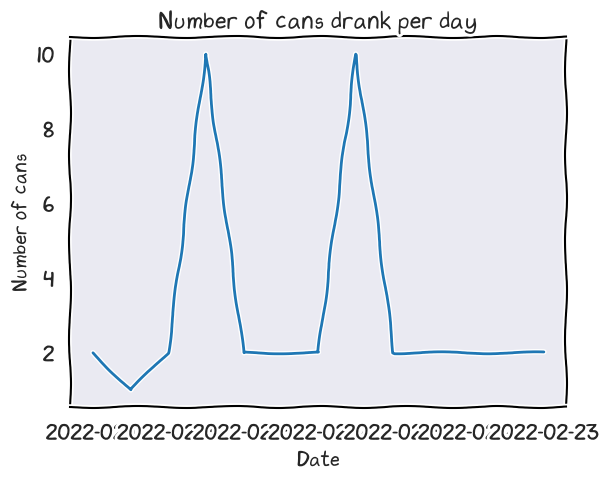

In [64]:
fig, ax = plt.subplots()
ax.plot(df_drinks["Date"], df_drinks["Number of cans"]) # TODO fix the axis here
ax.set_xlabel("Date")
ax.set_ylabel("Number of cans")
ax.set_title("Number of cans drank per day")

## Problem Set 5.11

In [76]:
t = np.arange(0, 10, 0.01)
s = 0.5 * 9.81 * (t ** 2)

with open('exercise511.txt', 'w') as f:
  f.write(f'Lim Hua En, {datetime.datetime.today()}')

np.savetxt('exercise511.txt', t)
np.savetxt('exercise511.txt', s)

## Problem Set 5.12

## Problem Set 5.13

In [114]:
# Import the dataset
df_planets = pd.read_table('planet_data.txt', sep=" ", header=1)

# Find Earth's density and mass
earth_data = df_planets.loc[df_planets["planet"] == "Earth"]
earth_density = earth_data["mass"] / (1.333 * np.pi * (earth_data["diameter"] / 2) ** 3)
earth_density = earth_density.values[0]
earth_mass = earth_data["mass"].values[0]

# Calculate the average density of all planets relative to that of Earth
df_planets["average density"] = (df_planets["mass"] / (1.333 * np.pi * (df_planets["diameter"] / 2) ** 3)) / earth_density

# Filter the dataset to only include planets larger than Earth
filtered_df_planets = df_planets.loc[df_planets["mass"] > earth_mass]
filtered_df_planets = filtered_df_planets.sort_values(by="average density", ascending=False)
print(filtered_df_planets)

    planet  distance   mass  gravity  diameter   year  average density
7  Neptune     30.00   17.0     1.12      3.88  164.0         0.291041
6   Uranus     19.20   15.0     0.89      4.01   84.0         0.232626
4  Jupiter      5.20  318.0     2.36     11.20   11.9         0.226346
5   Saturn      9.58   95.0     0.92      9.45   29.0         0.112571


## Problem Set 5.14

## Problem Set 5.15